In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
a_renomear = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido",
}

data = data.rename(columns=a_renomear)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_swipe = {
    'no': 0,
    'yes': 1,
}

data.vendido = data.vendido.map(a_swipe)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

actual_year = datetime.today().year
data['idade_do_modelo'] = actual_year - data.ano_do_modelo
data.head()


,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [5]:
data['km_por_ano'] = data.milhas_por_ano * 1.60934
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


data = data.drop(columns = ["Unamed: 0", "milhas_por_ano", "ano_modelo"], axis=1)

In [6]:
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = data[["preco", "idade_do_modelo", "km_por_ano"]]
y = data["vendido"]

SEED = 5
np.random.seed(SEED)

tranin_x, test_x, tranin_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Let's start training with %d elements and testing with %d elements" % (len(tranin_x), len(test_x)))

model = LinearSVC()
model.fit(tranin_x, tranin_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy is %.2f%%" % accuracy)


Let's start training with 7500 elements and testing with 2500 elements
The accuracy is 46.88%


/Users/raphaeltorquato/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
from sklearn.dummy import DummyClassifier


dummy_stratified = DummyClassifier()
dummy_stratified.fit(tranin_x, tranin_y)
accuracy = dummy_stratified.score(test_x, test_y) * 100
print(accuracy)


print("The accuracy is %.2f%%" % accuracy)



57.99999999999999
The accuracy is 58.00%


In [9]:
from sklearn.dummy import DummyClassifier


dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(tranin_x, tranin_y)
predictions = dummy_mostfrequent.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy is %.2f%%" % accuracy)



The accuracy is 58.00%


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


SEED = 5
np.random.seed(SEED)

raw_trainin_x, raw_test_x, trainin_y, test_y = train_test_split(x, y,test_size = 0.25, stratify = y)

print("Training with %d elements and testing with %d elements" %(len(raw_trainin_x), len(test_x)))

lsvc_model = DecisionTreeClassifier(max_depth=2)
lsvc_model.fit(raw_trainin_x, trainin_y)
predictions = lsvc_model.predict(raw_test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy is: %.2f%%" % accuracy)



Training with 7500 elements and testing with 2500 elements
The accuracy is: 76.84%


In [11]:
!pip install graphviz
!apt-get install graphviz

zsh:1: command not found: apt-get


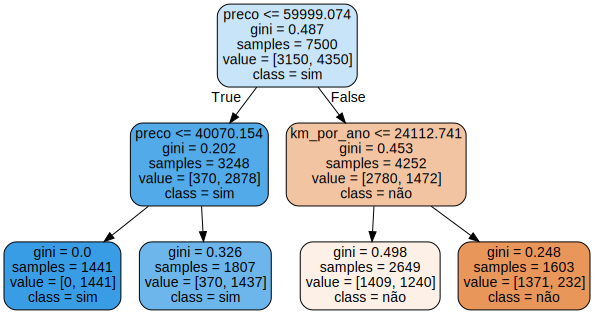

In [12]:
from sklearn.tree import export_graphviz
import graphviz


features = x.columns
dot_data = export_graphviz(lsvc_model, out_file=None, filled=True, rounded=True,feature_names = features, class_names = ["não", "sim"])
graphic = graphviz.Source(dot_data)
graphic